First commit at Kaggle, so go easy on me =)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [3]:
churn_data =pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv',index_col='RowNumber')

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# some columns are totally unproductive so let's remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [6]:
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})


In [7]:
churn_data_encoded = Gender_dummies

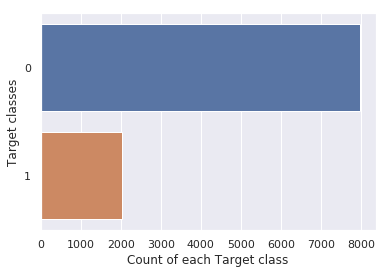

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [9]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

SGD would be better to use with data more than 100 000, but just for interest wanted to try it on this dataset

In [12]:
Model = SGDClassifier
param = {"loss": "log", "penalty": "l2"}
reg = Model(**param)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
predictions = (predictions > 0.5)
accuracy = accuracy_score(y_test, predictions)
print ("Accuracy score of {0}: {1}".format(Model.__name__, accuracy))

Accuracy score of SGDClassifier: 0.7987878787878788


In [13]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2617
           1       0.54      0.19      0.28       683

    accuracy                           0.80      3300
   macro avg       0.68      0.57      0.58      3300
weighted avg       0.76      0.80      0.76      3300



In [14]:
from sklearn.svm import LinearSVC
Model = LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions = (predictions > 0.5)
accuracy = accuracy_score(y_test, predictions)
print ("Accuracy score of {0}: {1}".format(Model.__name__, accuracy))

Accuracy score of LinearSVC: 0.8066666666666666


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
#import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2617
           1       0.63      0.16      0.25       683

    accuracy                           0.81      3300
   macro avg       0.72      0.57      0.57      3300
weighted avg       0.78      0.81      0.76      3300

